# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Importing Data

In [2]:
data_wine = pd.read_csv(r"C:\Users\user\Downloads\wines_SPA.csv")

In [3]:
data_wine

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [4]:
data_wine.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [5]:
data_wine.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [6]:
data_wine["type"] = data_wine["type"].fillna(data_wine["type"].mode()[0])

In [7]:
data_wine.isnull().mean()*100

winery          0.000000
wine            0.000000
year            0.026667
rating          0.000000
num_reviews     0.000000
country         0.000000
region          0.000000
price           0.000000
type            0.000000
body           15.586667
acidity        15.586667
dtype: float64

In [8]:
cols = [var for var in data_wine.columns if data_wine[var].isnull().mean() < 0.05 and data_wine[var].isnull().mean() > 0]
cols

['year']

### Defining a function to convert datatype of year column

In [9]:
def func(x):
    try :
        return int(x)
    except ValueError:
        return x
l = data_wine['year'].apply(func)
l = [*map(lambda x : type(x) == str, l.tolist())]

print(data_wine.loc[l, 'year'])

data_wine.loc[l, 'year'] = np.NaN
data_wine['year'] = data_wine.year.values.astype(float)

20      N.V.
133     N.V.
142     N.V.
143     N.V.
267     N.V.
        ... 
7388    N.V.
7413    N.V.
7438    N.V.
7463    N.V.
7488    N.V.
Name: year, Length: 288, dtype: object


## Dealing with Missing values

In [10]:
data_wine.isnull().sum()

winery            0
wine              0
year            290
rating            0
num_reviews       0
country           0
region            0
price             0
type              0
body           1169
acidity        1169
dtype: int64

### Filling the missing values in numerical variable using Mean

In [11]:
for i in ['year','body','acidity']:
    data_wine[i] = data_wine[i].fillna(data_wine[i].mean())

In [12]:
data_wine.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

- We have successfully imputed all the missing values

## Checking the duplicate values if any

In [13]:
data_wine.duplicated().sum()

5452

In [14]:
#Dropping duplicate rows
data_wine = data_wine.drop(data_wine[data_wine.duplicated()].index, axis=0)

In [15]:
data_wine.duplicated().sum()

0

In [16]:
data_wine.shape

(2048, 11)

In [17]:
data_wine['index'] = [i for i in range(0,2048)]

In [18]:
data_wine

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,index
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.000000,3.000000,0
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.000000,2.000000,1
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.000000,3.000000,2
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.000000,3.000000,3
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.000000,3.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2046,Mustiguillo,Finca Terrerazo,2017.0,4.2,390,Espana,El Terrerazo,24.45,Red,4.000000,3.000000,2043
2047,Matarromera,Gran Reserva,2011.0,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.000000,3.000000,2044
2048,Sei Solo,Preludio,2016.0,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.000000,3.000000,2045
2049,Vinedos de Paganos,El Puntido,2005.0,4.2,384,Espana,Rioja,73.00,Rioja Red,4.000000,3.000000,2046


In [19]:
#Analyzing the Data
data_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2048.0,2011.233252,10.996893,1910.00,2010.000000,2015.000,2017.00,2021.00
rating,2048.0,4.401123,0.147023,4.20,4.300000,4.400,4.50,4.90
num_reviews,2048.0,573.994629,1376.153171,25.00,58.000000,141.000,485.50,32624.00
price,2048.0,135.242194,272.178316,4.99,31.917947,53.625,110.00,3119.08
body,2048.0,4.245573,0.609041,2.00,4.000000,4.000,5.00,5.00
acidity,2048.0,2.924576,0.311889,1.00,3.000000,3.000,3.00,3.00
index,2048.0,1023.500000,591.350996,0.00,511.750000,1023.500,1535.25,2047.00


- 'year' value ranges from 1910 to 2021.As mean < median, we can say that it is slightly left skewed.
- 'rating' ranges from 4.2 to 4.9.As mean and median are almost equal, we can say that it is almost Normal Distributed.
- 'num_reviews' ranges from 25 to 32624.As mean is almost 4 times as of median , we can say that it is Highly rightly skewed.
- Also in this column we have very big difference between the 3rd quartile and maximum value , their is very high chances of   having outliers.
- 'price' ranges from 4.99 to 3119.mean is more than twice as that of median , it is Highly rightly skewed.
- Also in this column we have very big difference between the 3rd quartile and maximum value , their is very high chances of having outliers.
- 'body' value ranges from 2 to 5 . Mean is slightly greater than median , it is slightly right skewed.
- Also in this column we can observe big difference between the 1st quartile and minimum value , their is very high chances of having outliers.
- 'acidity' ranges from 1 to 3 . Mean ~ Median , we can say that it is almost Normal Distributed.

# Handling outliers

<AxesSubplot:>

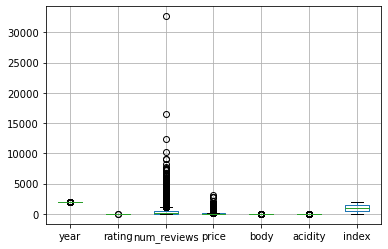

In [20]:
data_wine.boxplot()

In [21]:
data_wine.skew()

C:\Users\user\AppData\Local\Temp/ipykernel_6244/1385846375.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_wine.skew()


year          -3.772516
rating         0.803184
num_reviews    9.224139
price          5.115930
body          -0.720015
acidity       -4.901524
index          0.000000
dtype: float64

In [22]:
# To remove right skewness
data_log = data_wine[['rating','num_reviews','price']]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

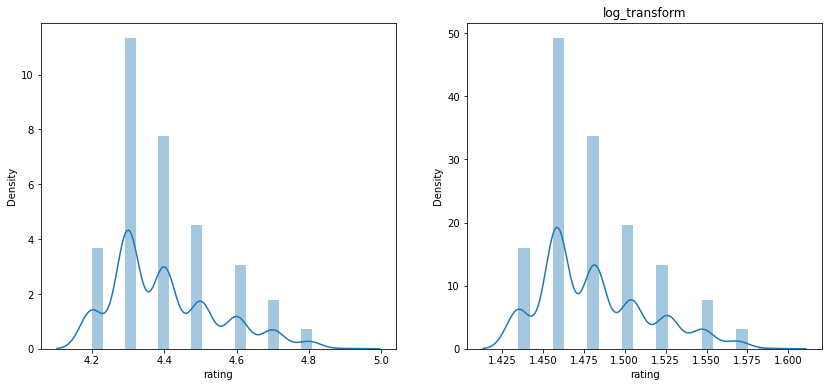

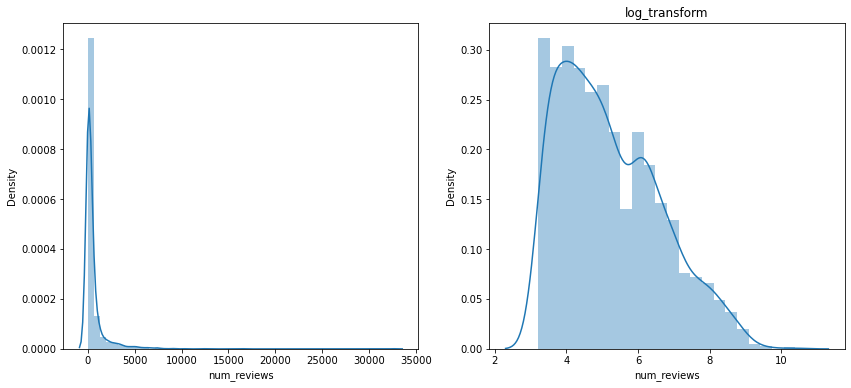

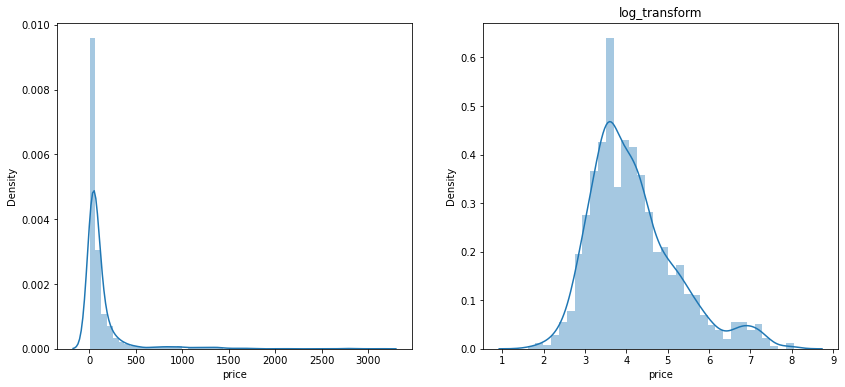

In [23]:
for col in data_log:
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.distplot(data_wine[col])
    
    plt.subplot(122)
    sns.distplot(np.log(data_log[col]))
    plt.title('log_transform')
    
plt.show()

In [24]:
#To remove left skewness
data_sqrt = np.sqrt(data_wine[['year','body','acidity']])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

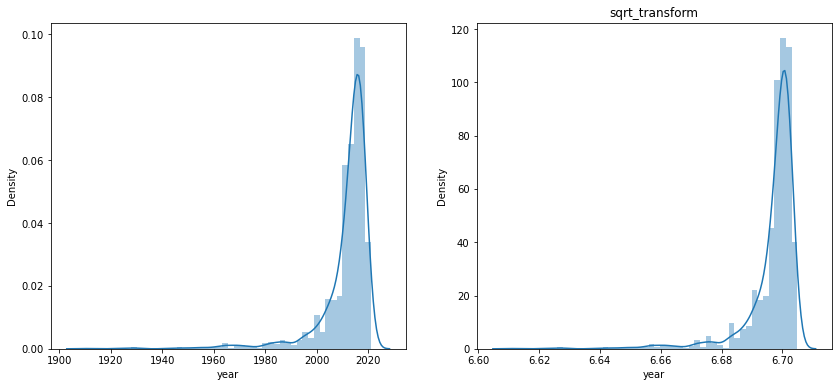

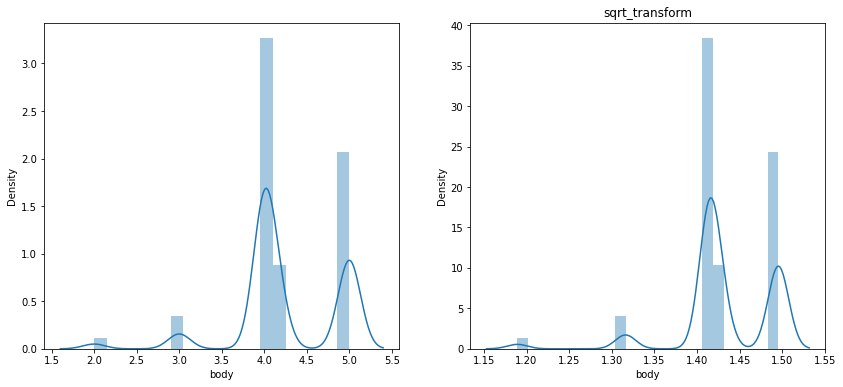

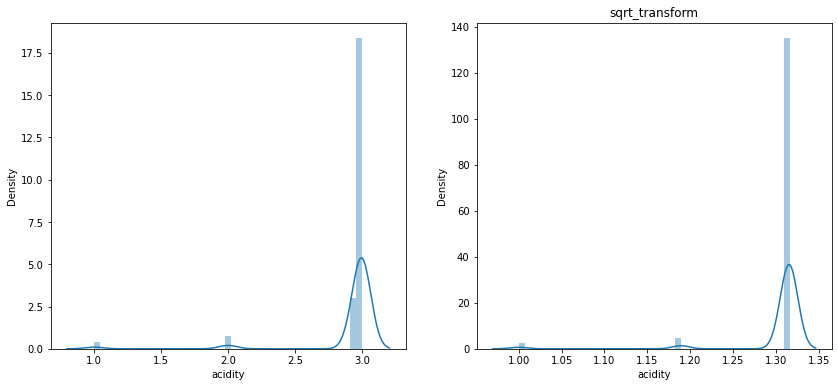

In [25]:
for col in data_sqrt:
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.distplot(data_wine[col])
    
    plt.subplot(122)
    sns.distplot(np.sqrt(data_sqrt[col]))
    plt.title('sqrt_transform')
    
plt.show()

# Handling outliers using z score

## Applying on num_reviews

In [26]:
upper_limit = data_wine['num_reviews'].mean() + 3*data_wine['num_reviews'].std()
lower_limit = data_wine['num_reviews'].mean() - 3*data_wine['num_reviews'].std()

In [27]:
df1= data_wine.copy()

df1['num_reviews'] = np.where(
    df1['num_reviews']>upper_limit,
    upper_limit,
    np.where(
        df1['num_reviews']<lower_limit,
        lower_limit,
        df1['num_reviews']
    )
)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

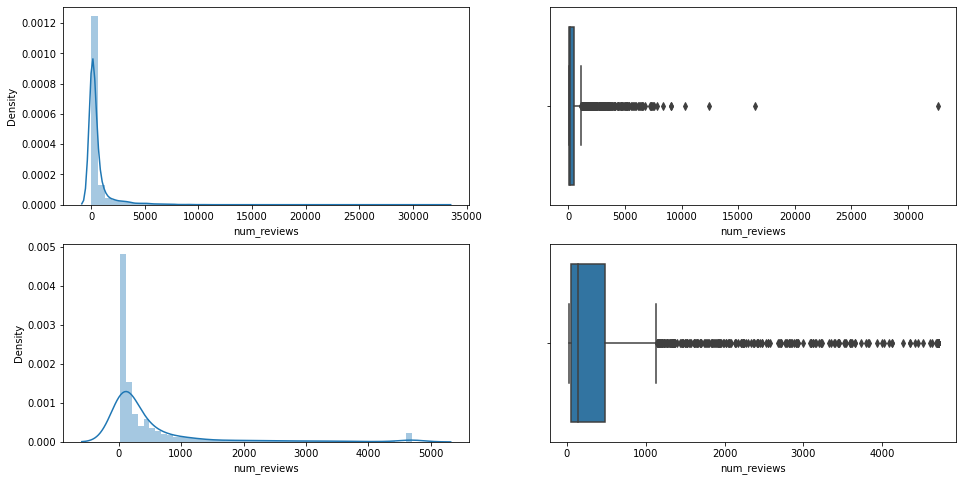

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_wine['num_reviews'])

plt.subplot(2,2,2)
sns.boxplot(data_wine['num_reviews'])

plt.subplot(2,2,3)
sns.distplot(df1['num_reviews'])

plt.subplot(2,2,4)
sns.boxplot(df1['num_reviews'])

plt.show()

## Applying on rating

In [29]:
upper_limit = data_wine['rating'].mean() + 3*data_wine['rating'].std()
lower_limit = data_wine['rating'].mean() - 3*data_wine['rating'].std()

In [30]:
df2= data_wine.copy()

df2['rating'] = np.where(
    df2['rating']>upper_limit,
    upper_limit,
    np.where(
        df2['rating']<lower_limit,
        lower_limit,
        df2['rating']
    )
)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

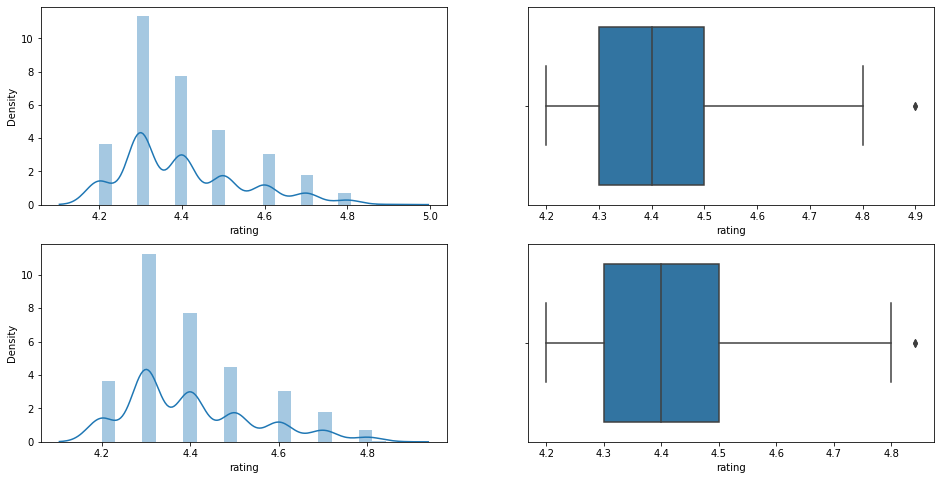

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_wine['rating'])

plt.subplot(2,2,2)
sns.boxplot(data_wine['rating'])

plt.subplot(2,2,3)
sns.distplot(df2['rating'])

plt.subplot(2,2,4)
sns.boxplot(df2['rating'])

plt.show()

## Applying on price

In [32]:
upper_limit = data_wine['price'].mean() + 3*data_wine['price'].std()
lower_limit = data_wine['price'].mean() - 3*data_wine['price'].std()

In [33]:
df3= data_wine.copy()

df3['price'] = np.where(
    df3['price']>upper_limit,
    upper_limit,
    np.where(
        df3['price']<lower_limit,
        lower_limit,
        df3['price']
    )
)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

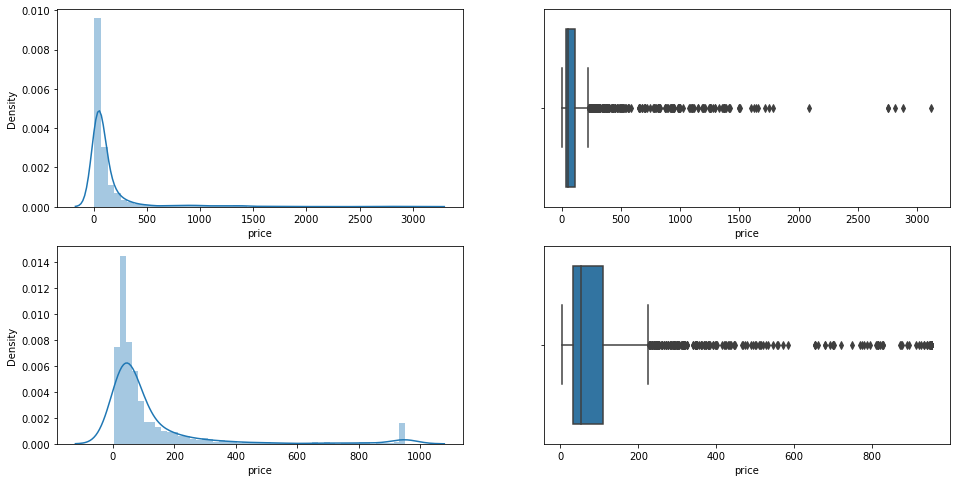

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_wine['price'])

plt.subplot(2,2,2)
sns.boxplot(data_wine['price'])

plt.subplot(2,2,3)
sns.distplot(df3['price'])

plt.subplot(2,2,4)
sns.boxplot(df3['price'])

plt.show()

# Handling outliers using percentile

## Applying on year

In [35]:
# Finding the IQR
percentile25 = data_wine['year'].quantile(0.25)
percentile75 = data_wine['year'].quantile(0.75)

In [36]:
iqr = percentile75 - percentile25
iqr

7.0

In [37]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2027.5
Lower limit 1999.5


In [38]:
data_wine[(data_wine.year<lower_limit)|(data_wine.year>upper_limit)]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,index
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.000000,3.000000,3
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.000000,3.000000,4
5,Vega Sicilia,Unico,1998.0,4.8,1209,Espana,Ribera del Duero,490.00,Ribera Del Duero Red,5.000000,3.000000,5
7,Vega Sicilia,Unico,1995.0,4.8,926,Espana,Ribera del Duero,810.89,Ribera Del Duero Red,5.000000,3.000000,7
13,Vega Sicilia,Unico,1970.0,4.8,417,Espana,Ribera del Duero,925.00,Ribera Del Duero Red,5.000000,3.000000,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Marques de Murrieta,Dalmau Rioja,1996.0,4.3,29,Espana,Rioja,110.00,Rioja Red,4.000000,3.000000,1777
1778,Marques de Riscal,Rioja Reserva,1964.0,4.3,29,Espana,Rioja,310.00,Rioja Red,4.000000,3.000000,1778
1786,Bodegas Faustino,I Gran Reserva,1968.0,4.3,28,Espana,Rioja,160.00,Rioja Red,4.000000,3.000000,1786
1859,Bodegas Faustino,I Gran Reserva,1994.0,4.2,2074,Espana,Rioja,124.50,Rioja Red,4.000000,3.000000,1858


In [39]:
df4 = data_wine.copy()

df4['year'] = np.where(
    df4['year'] > upper_limit,
    upper_limit,
    np.where(
        df4['year'] < lower_limit,
        lower_limit,
        df4['year']
    )
)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

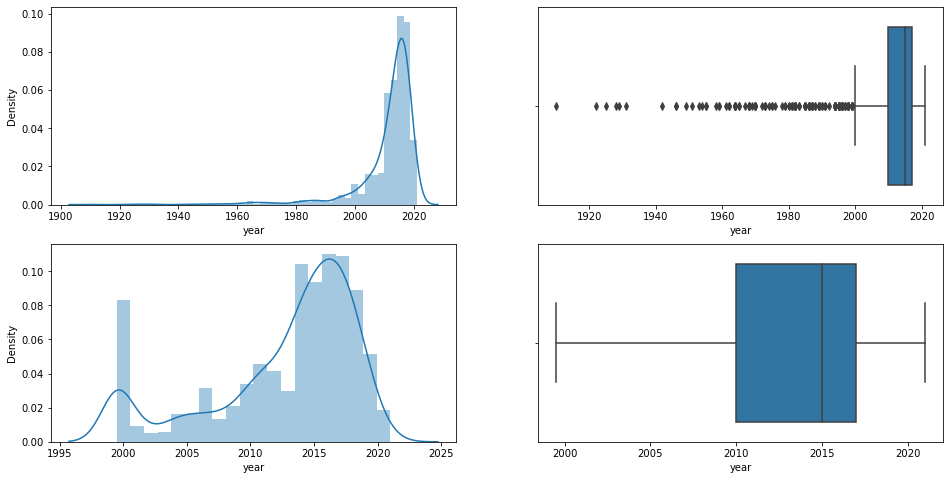

In [40]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_wine['year'])

plt.subplot(2,2,2)
sns.boxplot(data_wine['year'])

plt.subplot(2,2,3)
sns.distplot(df4['year'])

plt.subplot(2,2,4)
sns.boxplot(df4['year'])

plt.show()

## Applying on body

In [41]:
# Finding the IQR
percentile25 = data_wine['body'].quantile(0.25)
percentile75 = data_wine['body'].quantile(0.75)

In [42]:
iqr = percentile75 - percentile25
iqr

1.0

In [43]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 6.5
Lower limit 2.5


In [44]:
data_wine[(data_wine.body<lower_limit)|(data_wine.body>upper_limit)]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,index
129,Recaredo,Turo d'en Mota,2007.0,4.7,64,Espana,Cava,99.00,Cava,2.0,3.0,129
148,Recaredo,Reserva Particular de Recaredo Brut Nature,2011.0,4.7,35,Espana,Cava,65.05,Cava,2.0,3.0,148
271,Recaredo,Reserva Particular de Recaredo Brut Nature,2008.0,4.6,69,Espana,Cava,74.90,Cava,2.0,3.0,271
283,Gramona,Cava Enoteca Finca La Plana Brut Nature,2001.0,4.6,58,Espana,Cava,164.66,Cava,2.0,3.0,283
347,Recaredo,Corpinnat Enoteca Reserva Particular de Recaredo,2004.0,4.6,25,Espana,Cataluna,130.00,Sparkling,2.0,3.0,347
466,Recaredo,Turo d'en Mota,2005.0,4.5,161,Espana,Cava,90.00,Cava,2.0,3.0,466
471,Recaredo,Turo d'en Mota,2006.0,4.5,142,Espana,Cava,110.00,Cava,2.0,3.0,471
502,Mestres,Mas Via Gran Reserva Brut,2004.0,4.5,102,Espana,Cava,40.33,Cava,2.0,3.0,502
514,Mas del Serral,Mas del Serral,2007.0,4.5,82,Espana,Penedes,192.16,Sparkling,2.0,3.0,514
568,Agusti Torello Mata,Cava Kripta Gran Reserva Brut Nature,2013.0,4.5,49,Espana,Cava,53.70,Cava,2.0,3.0,568


In [45]:
df5 = data_wine.copy()

df5['body'] = np.where(
    df5['body'] > upper_limit,
    upper_limit,
    np.where(
        df5['body'] < lower_limit,
        lower_limit,
        df5['body']
    )
)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

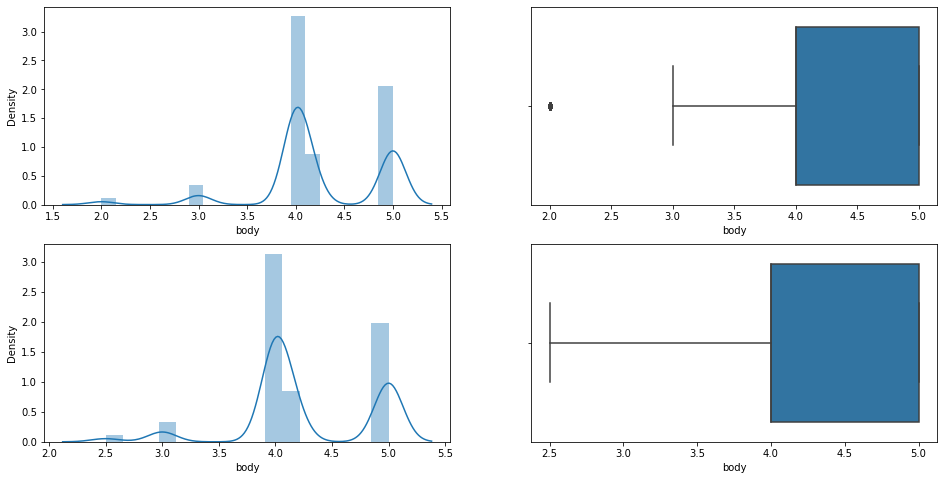

In [46]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_wine['body'])

plt.subplot(2,2,2)
sns.boxplot(data_wine['body'])

plt.subplot(2,2,3)
sns.distplot(df5['body'])

plt.subplot(2,2,4)
sns.boxplot(df5['body'])

plt.show()

## Applying on acidity

In [47]:
# Finding the IQR
percentile25 = data_wine['acidity'].quantile(0.25)
percentile75 = data_wine['acidity'].quantile(0.75)

In [48]:
iqr = percentile75 - percentile25
iqr

0.0

In [49]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 3.0
Lower limit 3.0


In [50]:
data_wine[(data_wine.acidity<lower_limit)|(data_wine.acidity>upper_limit)]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,index
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.000000,2.000000,1
14,Toro Albala,Don PX Convento Seleccion,1946.0,4.8,398,Espana,Montilla-Moriles,350.00,Pedro Ximenez,5.000000,1.000000,14
23,Toro Albala,Don PX Convento Seleccion,1931.0,4.8,139,Espana,Montilla-Moriles,244.85,Pedro Ximenez,5.000000,1.000000,23
26,Toro Albala,Don PX Pedro Ximenez,1946.0,4.8,103,Espana,Montilla-Moriles,285.86,Pedro Ximenez,5.000000,1.000000,26
32,Toro Albala,Don PX Convento Seleccion,1929.0,4.8,69,Espana,Montilla-Moriles,227.95,Pedro Ximenez,5.000000,1.000000,32
...,...,...,...,...,...,...,...,...,...,...,...,...
2022,Matarromera,Gran Reserva,2011.0,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,4.158427,2.946612,2021
2023,Sei Solo,Preludio,2016.0,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,4.158427,2.946612,2022
2024,Vinedos de Paganos,El Puntido,2005.0,4.2,384,Espana,Rioja,73.00,Rioja Red,4.158427,2.946612,2023
2042,Artadi,Valdegines,2016.0,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.000000,2.000000,2039


In [51]:
df6 = data_wine.copy()

df6['acidity'] = np.where(
    df6['acidity'] > upper_limit,
    upper_limit,
    np.where(
        df6['acidity'] < lower_limit,
        lower_limit,
        df6['acidity']
    )
)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

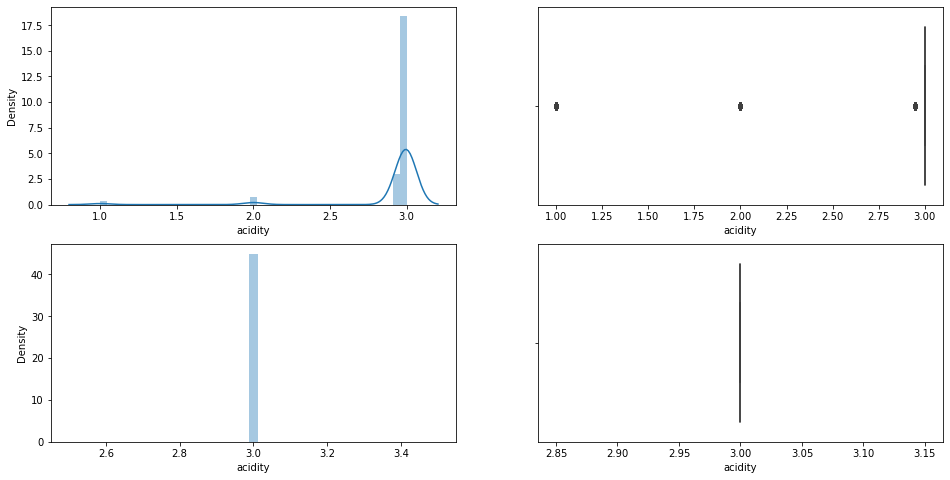

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_wine['acidity'])

plt.subplot(2,2,2)
sns.boxplot(data_wine['acidity'])

plt.subplot(2,2,3)
sns.distplot(df6['acidity'])

plt.subplot(2,2,4)
sns.boxplot(df6['acidity'])

plt.show()

In [53]:
def remove_outliers(data_wine):
    
    data_out = pd.DataFrame()
    data_out = pd.concat([data_out,df1,df2,df3,df4,df5,df6], ignore_index=True)
    return data_out

data_wine = remove_outliers(data_wine)

In [54]:
data_wine

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,index
0,Teso La Monja,Tinto,2013.0,4.9,58.0,Espana,Toro,995.00,Toro Red,5.000000,3.0,0
1,Artadi,Vina El Pison,2018.0,4.9,31.0,Espana,Vino de Espana,313.50,Tempranillo,4.000000,2.0,1
2,Vega Sicilia,Unico,2009.0,4.8,1793.0,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.000000,3.0,2
3,Vega Sicilia,Unico,1999.0,4.8,1705.0,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.000000,3.0,3
4,Vega Sicilia,Unico,1996.0,4.8,1309.0,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.000000,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
12283,Mustiguillo,Finca Terrerazo,2017.0,4.2,390.0,Espana,El Terrerazo,24.45,Red,4.000000,3.0,2043
12284,Matarromera,Gran Reserva,2011.0,4.2,389.0,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.000000,3.0,2044
12285,Sei Solo,Preludio,2016.0,4.2,388.0,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.000000,3.0,2045
12286,Vinedos de Paganos,El Puntido,2005.0,4.2,384.0,Espana,Rioja,73.00,Rioja Red,4.000000,3.0,2046


# Univariate Analysis

### Analysis on winery

In [55]:
data_wine.winery.value_counts()

Vega Sicilia                            582
Alvaro Palacios                         288
Artadi                                  258
La Rioja Alta                           216
Marques de Murrieta                     198
                                       ... 
Valdelosfrailes                           6
Briego                                    6
Guillem Carol - Cellers Carol Valles      6
Particular                                6
Binigrau                                  6
Name: winery, Length: 480, dtype: int64

- wines are coming from 480 winery

### Analysis on wine

In [56]:
data_wine.wine.value_counts()

Tinto                                                 336
Unico                                                 246
Valbuena 5o                                           192
Reserva                                               186
Priorat                                               156
                                                     ... 
San Valentin Parellada                                  6
Silvanus Edicion Limitada Ribera del Duero              6
El Jardin de las Iguales Vinedo Historico Garnacha      6
Garnacha Vinas Centenarias                              6
Capricho Crianza                                        6
Name: wine, Length: 847, dtype: int64

- There are 847 wine names.

### Analysis on year

In [57]:
data_wine.year.value_counts()

2016.0    1458
2017.0    1440
2015.0    1236
2018.0    1176
2014.0     948
          ... 
1992.0       5
1931.0       5
1942.0       5
1958.0       5
1954.0       5
Name: year, Length: 72, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Analysis of yr in which grape was harvested')

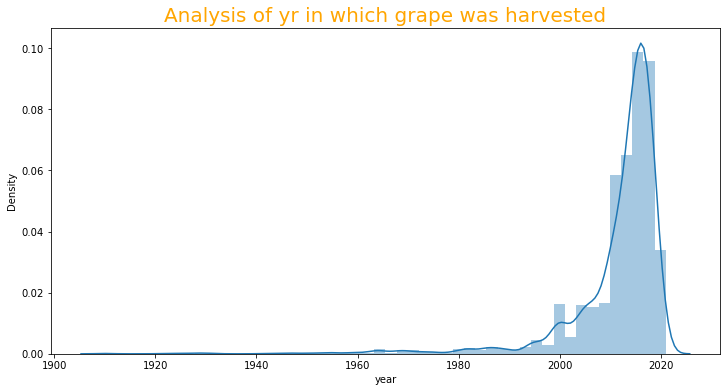

In [58]:
plt.figure(figsize=(12,6))
sns.distplot(data_wine.year)
plt.title(f"Analysis of yr in which grape was harvested" , fontsize=20,
          color="orange")

- Most of the wines are made of grapes which are harvested after 2000.

### Analysis on rating

In [59]:
data_wine.rating.value_counts()

4.300000    4236
4.400000    2904
4.500000    1686
4.200000    1368
4.600000    1146
4.700000     672
4.800000     264
4.900000      10
4.842192       2
Name: rating, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Analysis of rating')

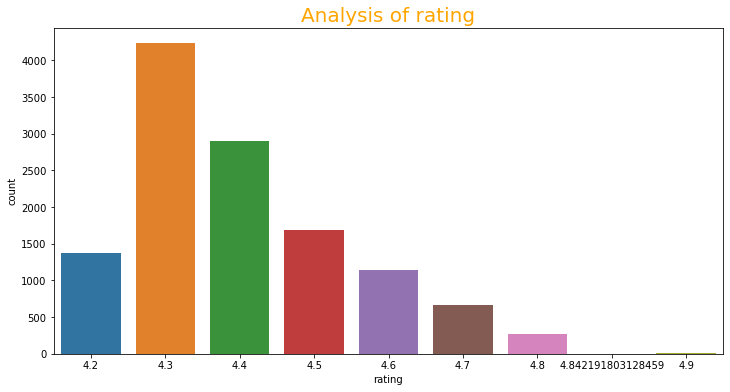

In [60]:
plt.figure(figsize=(12,6))
sns.countplot('rating',data=data_wine)
plt.title(f"Analysis of rating" , fontsize=20,
          color="orange")

- we can clearly see most of wine are rated between 4.3 and 4.5.

### Analysis on num_reviews

In [61]:
data_wine.num_reviews.value_counts()

28.0      174
27.0      156
32.0      144
35.0      126
31.0      120
         ... 
6395.0      5
5732.0      5
5614.0      5
5204.0      5
5178.0      5
Name: num_reviews, Length: 818, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Analysis on number of users that reviewed wine')

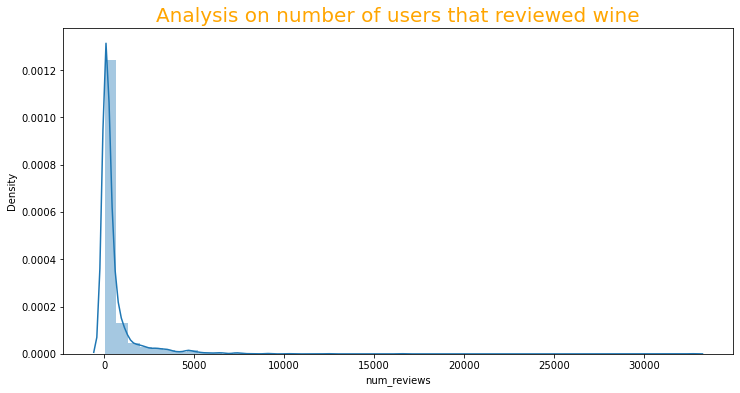

In [62]:
plt.figure(figsize=(12,6))
sns.distplot(data_wine.num_reviews)
plt.title(f"Analysis on number of users that reviewed wine" , fontsize=20,
          color="orange")

- Most of the wines are reviwed by 100 users or less than 100 as we can clearly see a very big spike there.
- As the dataset is of wines from spain ,so there is no need to review country column for all the records it will be Spain.

### Analysis on region

In [63]:
data_wine.region.value_counts().head(10)

Ribera del Duero      3246
Rioja                 2874
Priorato              1500
Toro                   492
Castilla y Leon        306
Vino de Espana         270
Cava                   204
Rias Baixas            204
Jerez-Xeres-Sherry     174
Montilla-Moriles       156
Name: region, dtype: int64

- Majority of wines are coming from the 3 regions : Ribera del Duero, Rioja, Priorato.

### Analysis on price(Target variable) 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Analysis on price of wine')

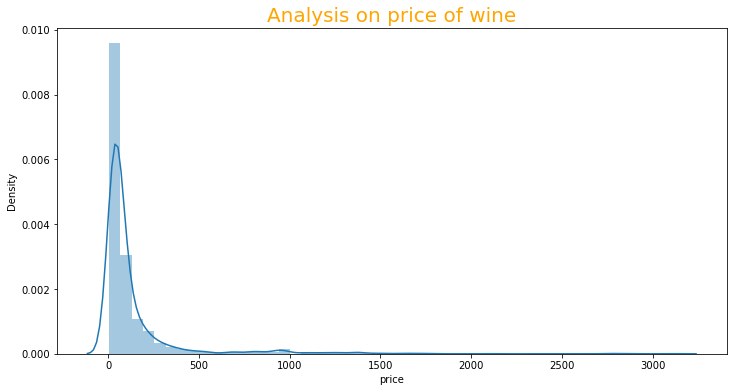

In [64]:
plt.figure(figsize=(12,6))
sns.distplot(data_wine.price)
plt.title(f"Analysis on price of wine" , fontsize=20,
          color="orange")

- Price of most of the wines less than 500.
- The above graph shows that price has right skewness. And we know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, so for that reason we had converted it into normal distribution.

### Analysis on type

In [65]:
data_wine.type.value_counts()

Rioja Red               3342
Ribera Del Duero Red    3210
Priorat Red             1428
Red                     1260
Toro Red                 468
Tempranillo              438
Sherry                   336
Rioja White              222
Pedro Ximenez            210
Grenache                 210
Albarino                 204
Cava                     198
Verdejo                  162
Monastrell               108
Mencia                   102
Montsant Red             102
Syrah                     90
Chardonnay                78
Cabernet Sauvignon        66
Sparkling                 30
Sauvignon Blanc           24
Name: type, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Toro Red'),
  Text(1, 0, 'Tempranillo'),
  Text(2, 0, 'Ribera Del Duero Red'),
  Text(3, 0, 'Pedro Ximenez'),
  Text(4, 0, 'Red'),
  Text(5, 0, 'Sherry'),
  Text(6, 0, 'Priorat Red'),
  Text(7, 0, 'Rioja Red'),
  Text(8, 0, 'Rioja White'),
  Text(9, 0, 'Grenache'),
  Text(10, 0, 'Cava'),
  Text(11, 0, 'Verdejo'),
  Text(12, 0, 'Syrah'),
  Text(13, 0, 'Monastrell'),
  Text(14, 0, 'Mencia'),
  Text(15, 0, 'Sparkling'),
  Text(16, 0, 'Montsant Red'),
  Text(17, 0, 'Albarino'),
  Text(18, 0, 'Chardonnay'),
  Text(19, 0, 'Cabernet Sauvignon'),
  Text(20, 0, 'Sauvignon Blanc')])

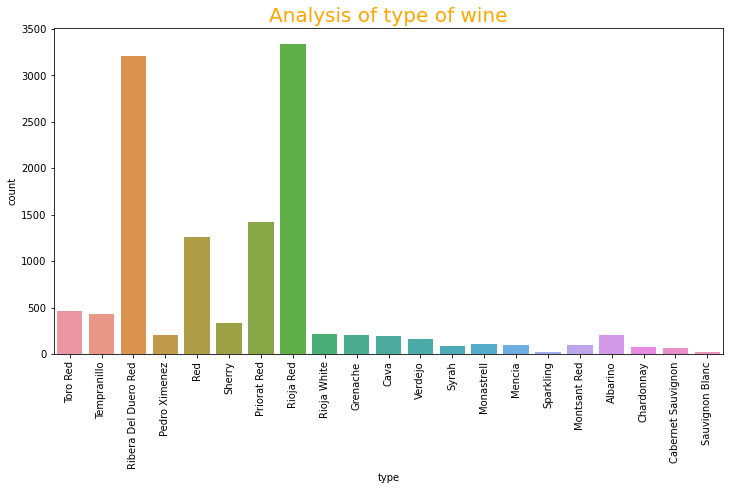

In [66]:
plt.figure(figsize=(12,6))
sns.countplot('type',data=data_wine)
plt.title(f"Analysis of type of wine" , fontsize=20,
          color="orange")
plt.xticks(rotation=90)


- 'Ribera Del Duero Red','Red','Rioja Red','Priorat Red' are some of the most availiable wine varities.
- In which 'Rioja Red' has most sales followed by 'Ribera Del Duero Red'.

### Analysis on body

In [67]:
data_wine.body.value_counts()

4.000000    6018
5.000000    3804
4.158427    1626
3.000000     636
2.000000     170
2.500000      34
Name: body, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Analysis of body score')

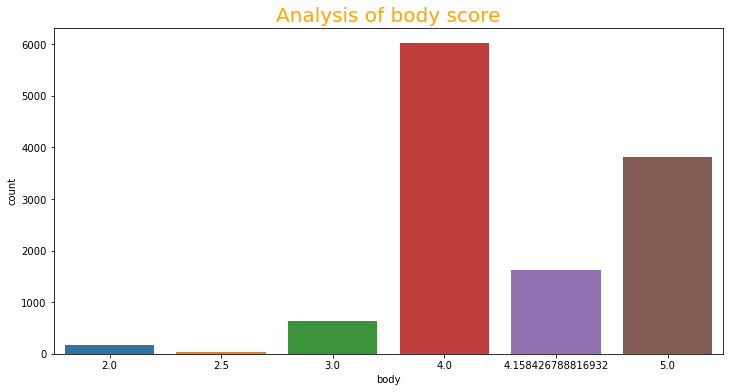

In [68]:
plt.figure(figsize=(12,6))
sns.countplot('body',data=data_wine)
plt.title(f"Analysis of body score" , fontsize=20,
          color="orange")

- Majority of the wine are rated 4 or 5 , which says wine from spain has good body score.

### Analysis on acidity

In [69]:
data_wine.acidity.value_counts()

3.000000    10408
2.946612     1355
2.000000      350
1.000000      175
Name: acidity, dtype: int64

- More than 90 % of the wine has high acidity rating.

# Bivariate Analysis 

### Analysis on year and price

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'price V/s year')

<Figure size 1440x1440 with 0 Axes>

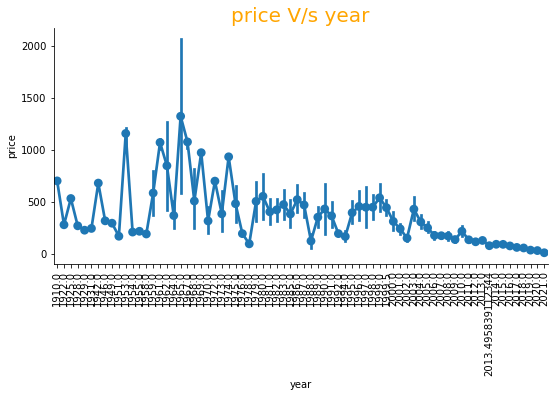

In [70]:
plt.figure(figsize=(20,20))
sns.factorplot(x='year',y='price',data=data_wine,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"price V/s year" , fontsize=20,
          color="orange")


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bivariate Analysis of year and price')

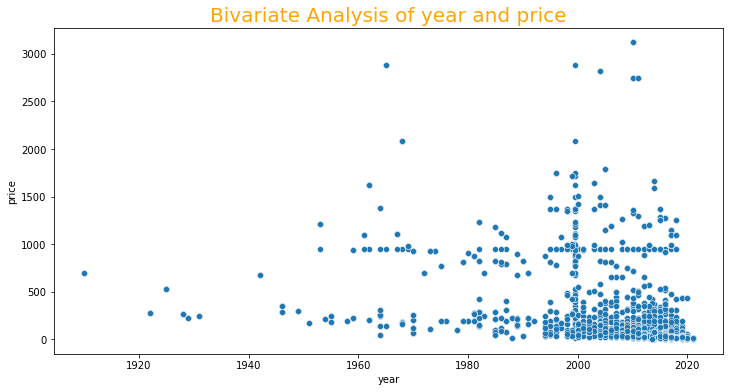

In [71]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['year'],data_wine['price']))
plt.title(f"Bivariate Analysis of year and price" , fontsize=20,
          color="orange")

- By looking at it we can say that prices of wines is low for wines which have grapes harvested about 20-30 years.

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'price V/s year')

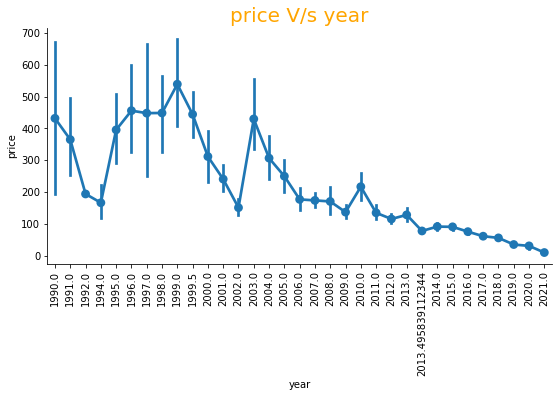

In [72]:
year_after_1990 = data_wine[data_wine["year"]>=1990]
sns.factorplot(x='year',y='price',data=year_after_1990,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"price V/s year" , fontsize=20,
          color="orange")


- There is clearly a downward trend , as time period is increasing price is decresing.

### Analysis of year and rating 

Text(0.5, 1.0, 'rating V/s price')

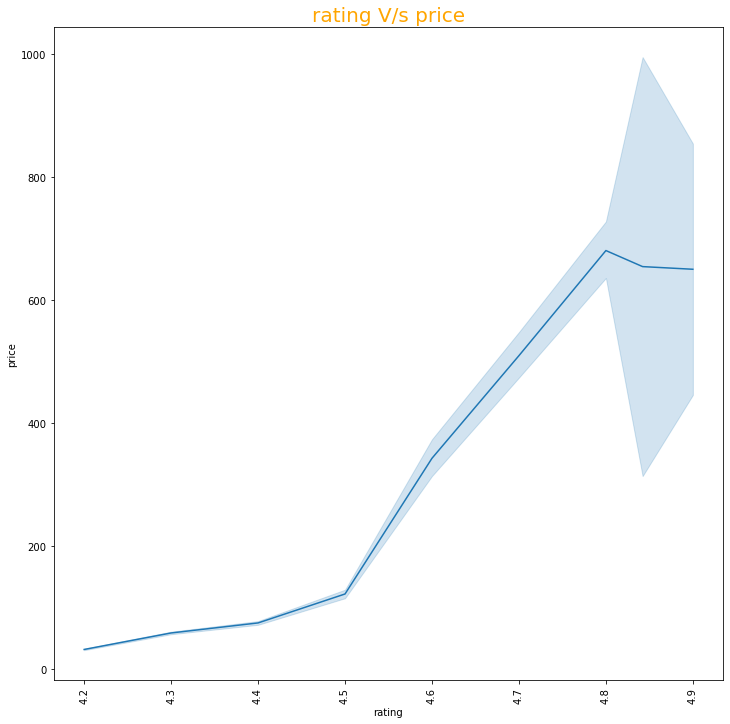

In [73]:
plt.figure(figsize=(12,12))
sns.lineplot(x='rating',y='price',data=data_wine)
plt.xticks(rotation=90)
plt.title(f"rating V/s price" , fontsize=20,
          color="orange")

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bivariate Analysis of rating and price')

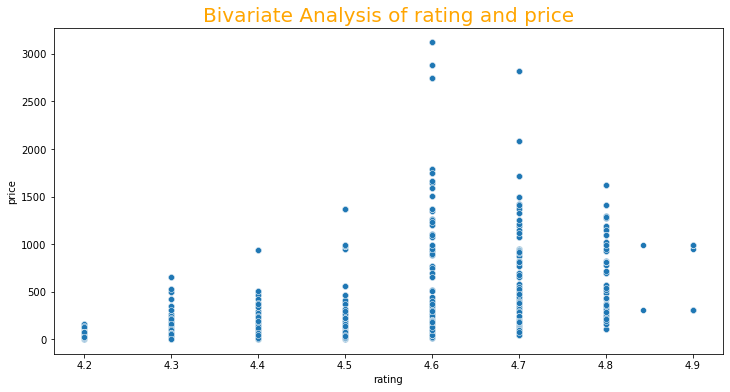

In [74]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['rating'],data_wine['price']))
plt.title(f"Bivariate Analysis of rating and price" , fontsize=20,
          color="orange")

- we can say that their is gradual increase in the price of wine with increase in ratings.(+ ve linear relation)

Text(0.5, 1.0, 'rating V/s year')

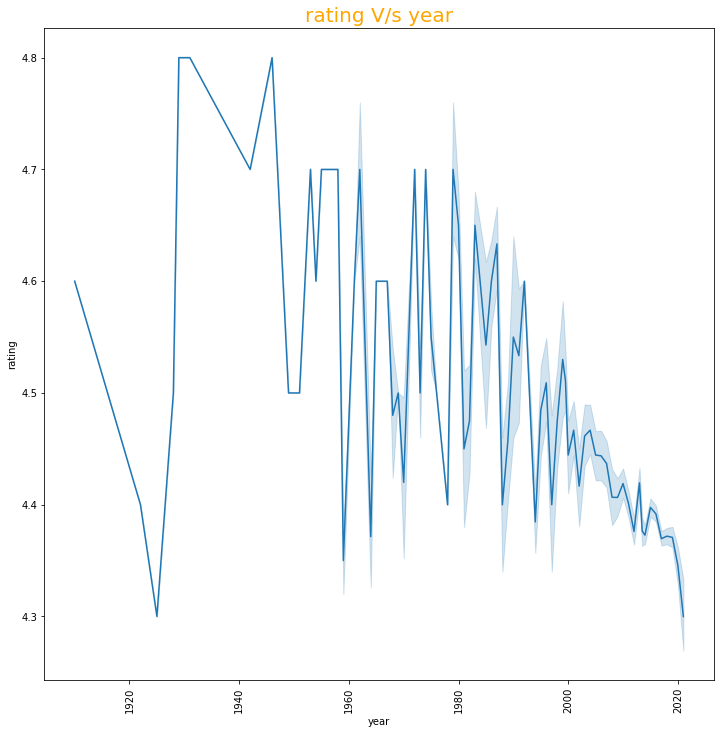

In [75]:
# Years and Ratings Analysis

plt.figure(figsize=(12,12))
sns.lineplot(y='rating',x='year',data=data_wine)
plt.xticks(rotation=90)
plt.title(f"rating V/s year" , fontsize=20,
          color="orange")

- Wines which have made in recent years got lower ratings but wines which had made early years got so much ratings.

### Analysis of price and num_reviews

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bivariate Analysis of number of reviews and price')

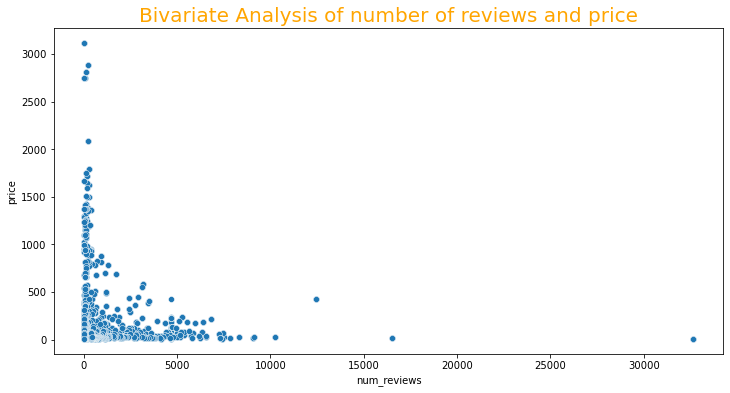

In [76]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['num_reviews'],data_wine['price']))
plt.title(f"Bivariate Analysis of number of reviews and price" , fontsize=20,
          color="orange")

- prices of wine is high, when the number of reviews are less.
- as price is positively linearly related with rating ,we should check the relation between ratings and number of reviews.

Text(0.5, 1.0, 'num_reviews V/s ratings')

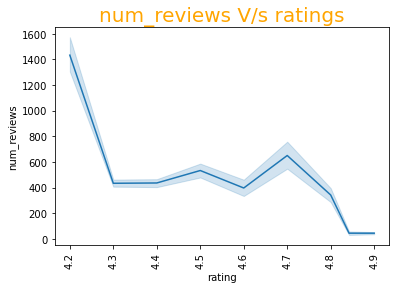

In [77]:
# Bivariate Analysis between number of reviews and ratings
sns.lineplot(x='rating',y='num_reviews',data=data_wine)
plt.xticks(rotation=90)
plt.title(f"num_reviews V/s ratings" , fontsize=20,
          color="orange")


- 4.2 got high number of reviews, where as 4.9 got very low number of reviews.

### Analysis of price and region

In [78]:
top10 = data_wine.groupby('region')['price'].agg(['sum',"mean",'size']).reset_index().sort_values(by="sum",ascending=False).head(10)
top10

,region,sum,mean,size
57,Ribera del Duero,670195.388999,206.468080,3246
53,Priorato,297157.833072,198.105222,1500
59,Rioja,253771.144311,88.298937,2874
69,Toro,97009.079994,197.172927,492
74,Vino de Espana,51566.040000,190.985333,270
8,Bierzo,38657.211426,247.802637,156
44,Montilla-Moriles,27875.580000,178.689615,156
15,Castilla y Leon,15966.825270,52.179168,306
34,Jerez-Xeres-Sherry,14472.720000,83.176552,174
35,Jumilla,12569.859921,80.576025,156


Text(0.5, 1.0, 'Top 10 regions Sales Wise')

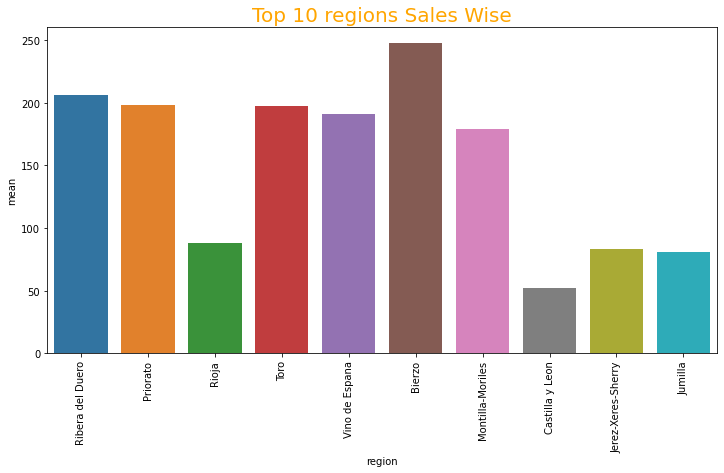

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x=top10['region'],y=top10['mean'])
plt.xticks(rotation=90)
plt.title(f"Top 10 regions Sales Wise" , fontsize=20,
          color="orange")

- These are the top 10 regions with highest sales of wine.

### Analysis of price and type

Text(0.5, 1.0, 'Avg Sales of Wine type wise')

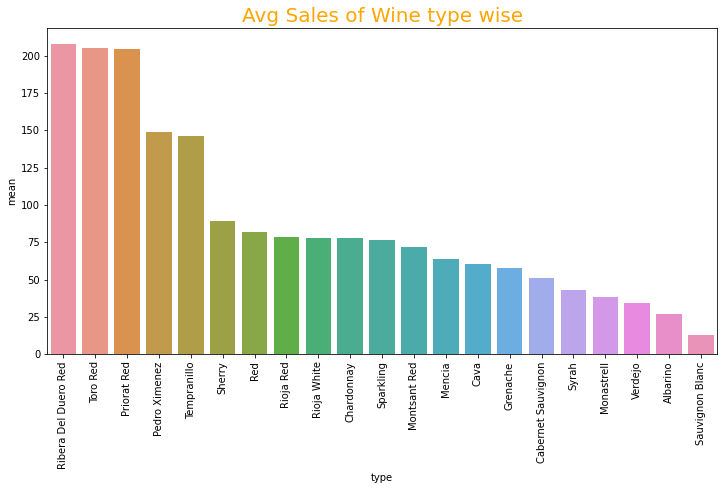

In [80]:
sorted_sales = data_wine.groupby('type')['price'].agg(['sum',"mean",'size']).reset_index().sort_values(by="mean",ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=sorted_sales['type'],y=sorted_sales['mean'],data = sorted_sales.sort_values(by="mean",ascending=False))
plt.xticks(rotation=90)
plt.title(f"Avg Sales of Wine type wise" , fontsize=20,
          color="orange")

### Analysis of price and body

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'price V/s body score')

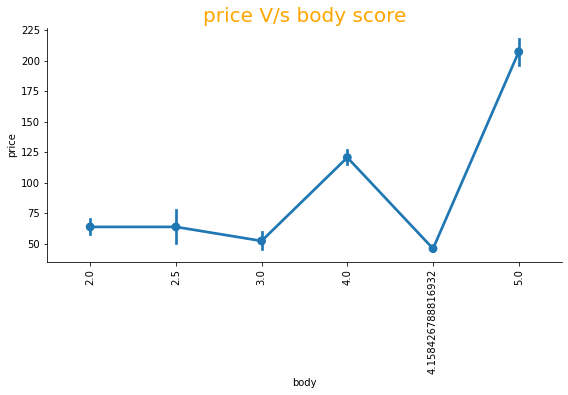

In [81]:
sns.factorplot(x='body',y='price',data=data_wine,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"price V/s body score" , fontsize=20,
          color="orange")

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bivariate Analysis of body score and price')

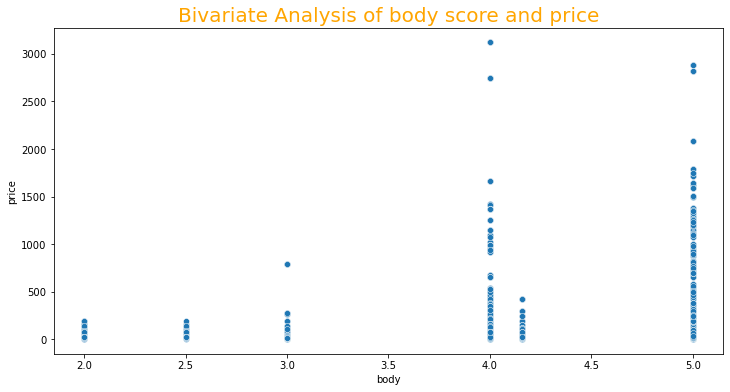

In [82]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['body'],data_wine['price']))
plt.title(f"Bivariate Analysis of body score and price" , fontsize=20,
          color="orange")

- Their is linear positive relation between body score and price.

### Analysis of price and acidity

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'price V/s body score')

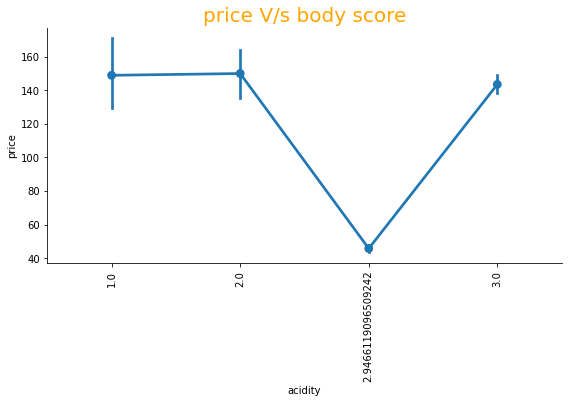

In [83]:
sns.factorplot(x='acidity',y='price',data=data_wine,size=4, aspect=2)
plt.xticks(rotation=90)
plt.title(f"price V/s body score" , fontsize=20,
          color="orange")

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bivariate Analysis of body score and price')

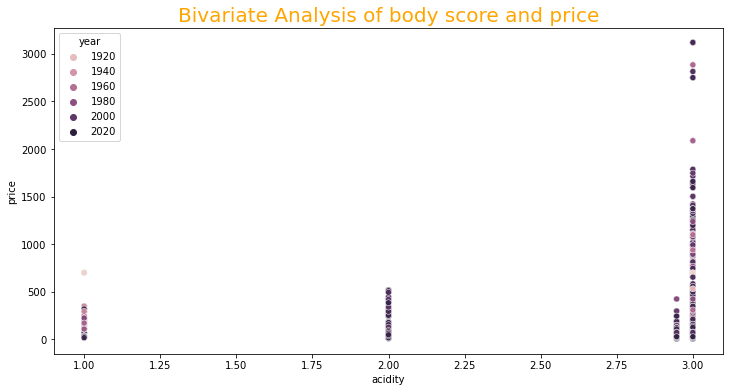

In [84]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(data_wine['acidity'],data_wine['price'],hue=data_wine["year"]))
plt.title(f"Bivariate Analysis of body score and price" , fontsize=20,
          color="orange")

- Prices of wines having high acidity values is low because most of high acidity score wines are made of grapes that are harvested in recent past, as we have already concluded Older wine has higher price.

In [85]:
# corelatoin between the different features
corr = data_wine.corr(method ='pearson')
corr

,year,rating,num_reviews,price,body,acidity,index
year,1.000000,-0.253593,0.051911,-0.368786,-0.103139,0.226799,0.206522
rating,-0.253593,1.000000,-0.099073,0.514259,0.214792,-0.090963,-0.937240
num_reviews,0.051911,-0.099073,1.000000,-0.066643,0.097670,0.055486,0.013608
price,-0.368786,0.514259,-0.066643,1.000000,0.174606,-0.005669,-0.419309
body,-0.103139,0.214792,0.097670,0.174606,1.000000,-0.080376,-0.207457
acidity,0.226799,-0.090963,0.055486,-0.005669,-0.080376,1.000000,0.082959
index,0.206522,-0.937240,0.013608,-0.419309,-0.207457,0.082959,1.000000


Text(0.5, 1.0, 'Heatmap')

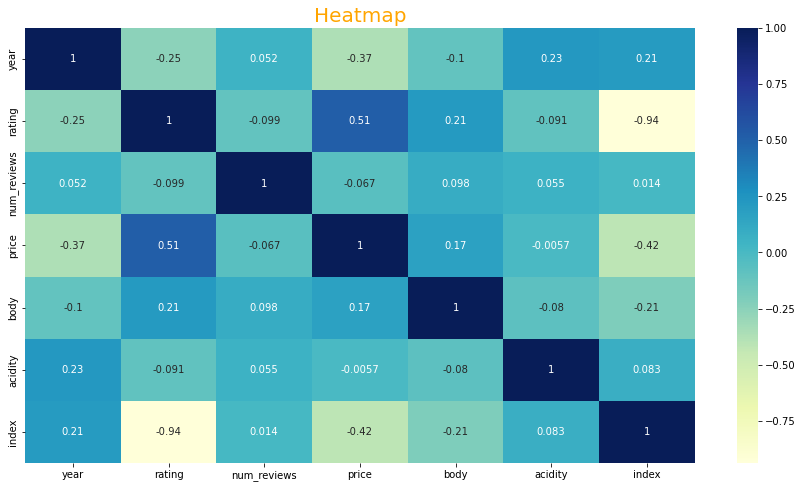

In [86]:
# Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.title(f"Heatmap" , fontsize=20,
          color="orange")

We have linear relationships in below featues as we got to know from above heatmap
- Their is high correlation between price and rating as already discussed.
- we also have moderate correlation between year and acidity.
- their is also moderate realtion between rating and year.
- Their is high - ve correlation between price and year.

# Conclusions from EDA

- wines are coming from 480 winery
- There are 847 wine names.
- Most of the wines are made of grapes which are harvested after 2000.
- we can clearly see most of wine are rated between 4.3 and 4.5.
- Most of the wines are reviwed by 100 users or less than 100 as we can clearly see a very big spike there.
- Majority of wines are coming from the 3 regions : Ribera del Duero, Rioja, Priorato.
- Price of most of the wines less than 200.
- 'Ribera Del Duero Red','Red','Rioja Red','Priorat Red' are some of the most availiable wine varities.
- In which 'Rioja Red' has most sales followed by 'Ribera Del Duero Red'.
- Majority of the wine are rated 4 or 5 , which says wine from spain has good body score.
- More than 90 % of the wine has high acidity rating.
- prices of wines is low for wines which have grapes harvested about 20-30 years.
- But as the data range values after 1990 would be interesting to see.There is clearly a downward trend , as time period is increasing price is decresing.
- we can say that their is gradual increase in the price of wine with increase in ratings.(+ ve linear relation),we have also analyse the relation between number of years and ratings.
- Older Wine is more valuable than recent grapped ones.
- prices of wine is high, when the number of reviews are less.As price is positively linearly related with rating ,we have also checked the relation between ratings and number of reviews.
- The more people review a wine, the less rating this wine get.
- Their is linear positive relation between body score and price.
- Prices of wines having high acidity values is low because most of high acidity score wines are made of grapes that are harvested in recent past, as we have already concluded Older wine has higher price.

# Data Preprocessing

## Dropping the country column

In [87]:
data_wine.drop(columns=["country"],axis=1,inplace=True)

In [88]:
# verifying the change

data_wine.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity,index
0,Teso La Monja,Tinto,2013.0,4.9,58.0,Toro,995.00,Toro Red,5.0,3.0,0
1,Artadi,Vina El Pison,2018.0,4.9,31.0,Vino de Espana,313.50,Tempranillo,4.0,2.0,1
2,Vega Sicilia,Unico,2009.0,4.8,1793.0,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,2
3,Vega Sicilia,Unico,1999.0,4.8,1705.0,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,3
4,Vega Sicilia,Unico,1996.0,4.8,1309.0,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,4


## Identifying categorical variables

In [89]:
print('Categorical columns: ')
for col in data_wine.columns:
    if data_wine[col].dtype == 'object':
        print(str(col))

Categorical columns: 
winery
wine
region
type


In [90]:
X = data_wine.drop(columns = ["price"],axis=1)
y = (data_wine['price'])

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
print(X_train.shape)
print(X_test.shape)

(9830, 10)
(2458, 10)


In [93]:
for col in data_wine.columns:
    print(col, ': ', len(data_wine[col].unique()), 'lebels')

winery :  480 lebels
wine :  847 lebels
year :  72 lebels
rating :  9 lebels
num_reviews :  818 lebels
region :  76 lebels
price :  1293 lebels
type :  21 lebels
body :  6 lebels
acidity :  4 lebels
index :  2048 lebels


In [94]:
# one hot encoding
col_trans = ColumnTransformer([
    ('ohe_col',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,5,6])
]
    ,remainder='passthrough')

In [95]:
# Scaling
scaled = StandardScaler()

## Create Pipeline for LinearRegression

In [96]:
# train the model
lr = LinearRegression()

In [97]:
pipe = make_pipeline(col_trans,scaled,lr)

In [98]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [99]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 5, 6])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [100]:
pipe.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_col',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1, 5, 6])]),
 'standardscaler': StandardScaler(),
 'linearregression': LinearRegression()}

In [101]:
# Predict
y_pred = pipe.predict(X_test)

In [102]:
y_test

4123     951.777142
3872      23.000000
2771      55.330000
8870      24.800000
4291      85.700000
           ...     
549      559.020000
3777      60.400000
8223    1182.770000
4442     197.300000
3011      31.500000
Name: price, Length: 2458, dtype: float64

In [103]:
#getting the X_train and X-test value
y_pred_train= pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

In [104]:
#importing package
from sklearn import metrics

#calculating MAE
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculating r2 and adjusted r2
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(1638-1)/(1638-1-10))
print("Adjusted R2 :",Adjusted_R2)

MAE : 56.352754665986886
MSE : 14586.45215367949
RMSE : 120.77438533761821
R2 : 0.7892146029200342
Adjusted R2 : 0.7879190565335562


In [105]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [106]:
#calculating MAE
MAE= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE)

#calculating MSE
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)

#calculating RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculating r2 and adjusted r2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(410-1)/(410-1-10))
print("Adjusted R2 :",Adjusted_R2)

MAE : 58.74611456666589
MSE : 14488.971353402905
RMSE : 120.37014311449042
R2 : 0.7717703153322226
Adjusted R2 : 0.7660502731099725


In [107]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

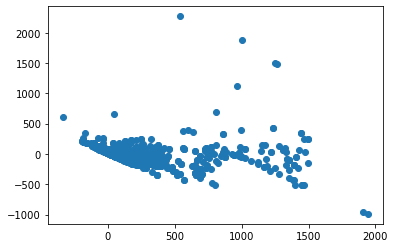

In [108]:
#Checking Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

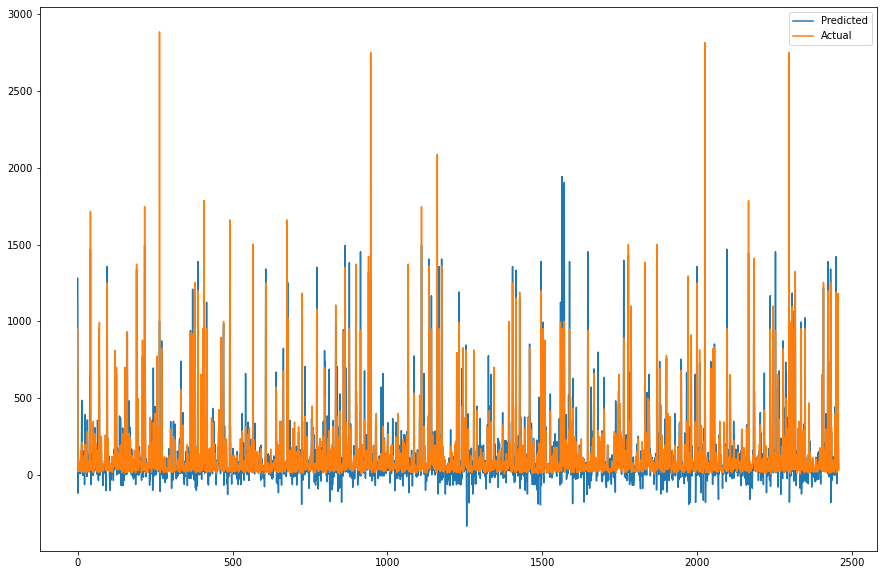

In [109]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## Lasso Regression

In [110]:
#Lasso Regression implementation
lasso = Lasso()

In [111]:
pipe = make_pipeline(col_trans,scaled,lasso)

In [112]:
# Fitting the Lasso model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 5, 6])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [113]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X_train : (9830, 10)
X_test : (2458, 10)


In [114]:
#getting the X_train and X-test value
y_pred_train_lasso=pipe.predict(X_train)
y_pred_test_lasso=pipe.predict(X_test)
from sklearn.metrics import mean_squared_error
#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(1638-1)/(1638-1-10))
print("Adjusted R2 :",(1-(1-r2)*(1638-1)/(1638-1-10)) )

MSE : 12824.462738926286
RMSE : 113.2451444386305
MAE : 39.77051423548683
R2 : 0.8146766984677691
Adjusted R2 : 0.8135376492880997


In [115]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [116]:
#calculating MSE
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(410-1)/(410-1-10))
print("Adjusted R2 :",(1-(1-r2)*(410-1)/(410-1-10)) )

MSE : 11836.75822482085
RMSE : 108.79686679689287
MAE : 39.615926127797856
R2 : 0.8135478681511021
Adjusted R2 : 0.8088748823904781


In [117]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

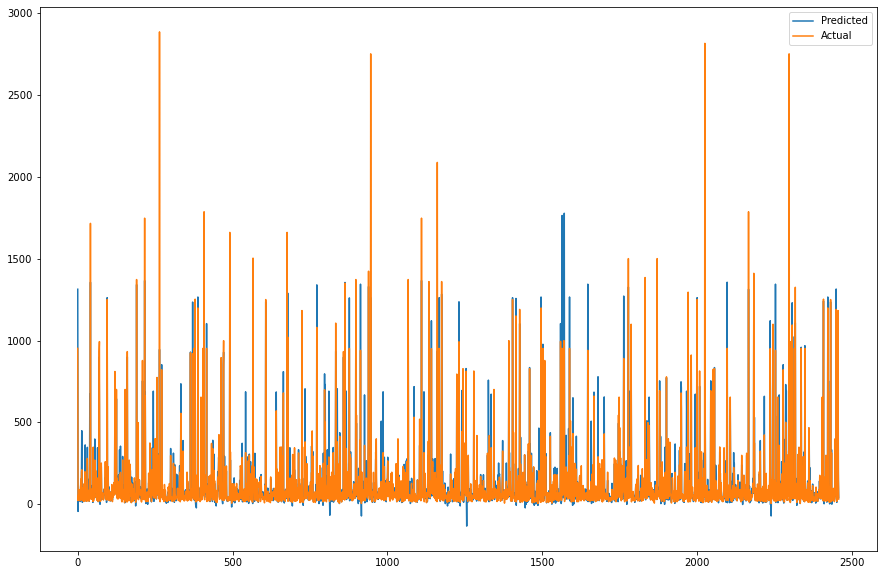

In [118]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

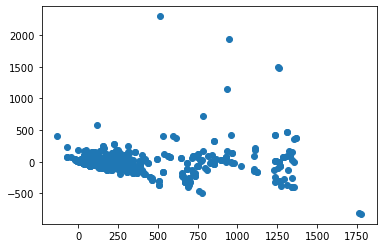

In [119]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

## Ridge Regression

In [120]:
#Ridge Regression implementation
ridge = Ridge()

In [121]:
pipe = make_pipeline(col_trans,scaled,ridge)

In [122]:
# Fitting the Lasso model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 5, 6])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [123]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X_train : (9830, 10)
X_test : (2458, 10)


In [124]:
#getting the X_train and X-test value
y_pred_train_ridge=pipe.predict(X_train)
y_pred_test_ridge=pipe.predict(X_test)

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(1638-1)/(1638-1-10))
print("Adjusted R2 :",(1-(1-r2)*(1638-1)/(1638-1-10)) )

MSE : 12380.817538318748
RMSE : 111.26912212432858
MAE : 33.28584861801196
R2 : 0.8210877111518295
Adjusted R2 : 0.8199880658608144


In [125]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [126]:
#calculating MSE
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(410-1)/(410-1-10))
print("Adjusted R2 :",(1-(1-r2)*(410-1)/(410-1-10)) )

MSE : 11505.482900300773
RMSE : 107.26361405574946
MAE : 33.613698186600146
R2 : 0.8187661035253943
Adjusted R2 : 0.8142239006062312


In [127]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

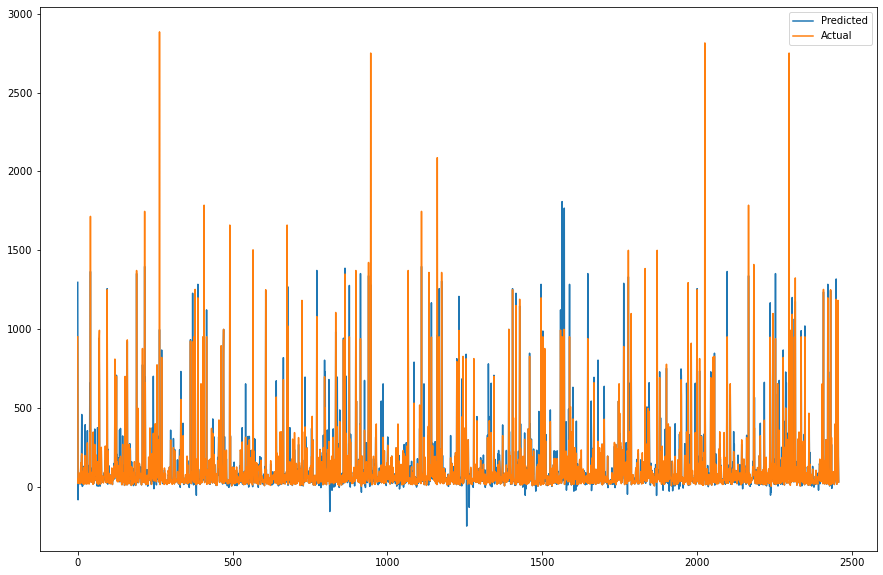

In [128]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

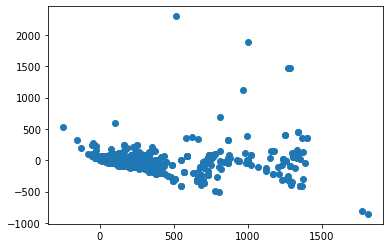

In [129]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

## ElasticNet Regression

In [130]:
#ElasticNet Regression implementation
elasticnet = ElasticNet()

In [131]:
pipe = make_pipeline(col_trans,scaled,elasticnet)

In [132]:
# Fitting the Lasso model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 5, 6])])),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [133]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X_train : (9830, 10)
X_test : (2458, 10)


In [134]:
#getting the X_train and X-test value
y_pred_train_elasticnet=pipe.predict(X_train)
y_pred_test_elasticnet=pipe.predict(X_test)

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_elasticnet))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_elasticnet)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_elasticnet)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(1638-1)/(1638-1-10))
print("Adjusted R2 :",(1-(1-r2)*(1638-1)/(1638-1-10)) )

MSE : 17451.419936008384
RMSE : 132.10382256395303
MAE : 51.213940138440954
R2 : 0.7478136258176502
Adjusted R2 : 0.7462636173715387


In [135]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [136]:
#calculating MSE
MSE= mean_squared_error((y_test), (y_pred_test_elasticnet))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_test, y_pred_test_elasticnet)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_elasticnet)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(410-1)/(410-1-10))
print("Adjusted R2 :",(1-(1-r2)*(410-1)/(410-1-10)) )

MSE : 15295.019284106676
RMSE : 123.67303377902022
MAE : 50.79173533207693
R2 : 0.7590734812668816
Adjusted R2 : 0.7530352226520164


In [137]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

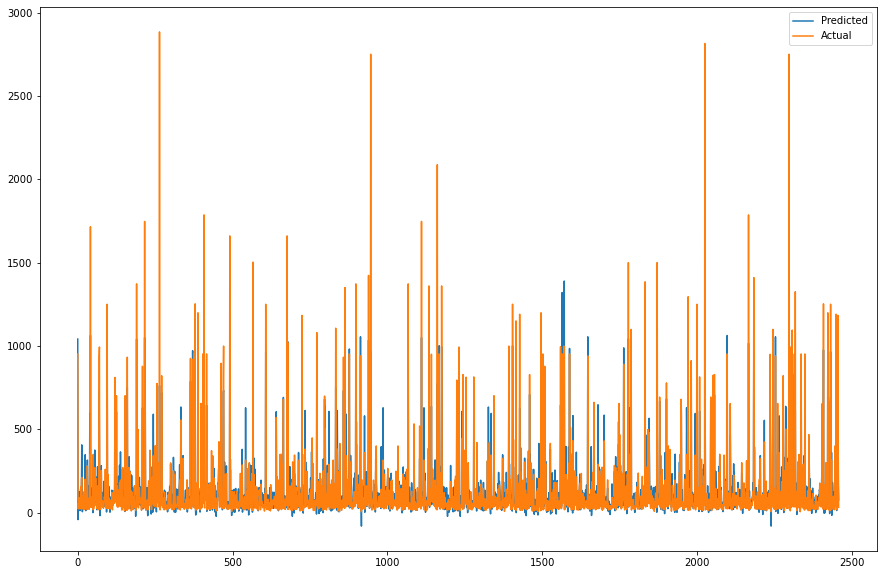

In [138]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_elasticnet))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

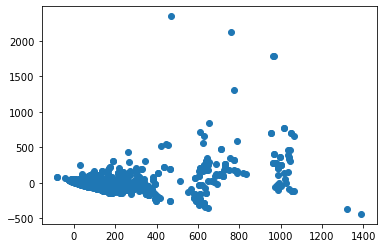

In [139]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_elasticnet),(y_test)-(y_pred_test_elasticnet))

## Decision Tree Regression

In [140]:
#Decision Tree Regression implementation
decision_regressor = DecisionTreeRegressor()

In [141]:
pipe = make_pipeline(col_trans,scaled,decision_regressor)

In [142]:
# Fitting the Lasso model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 5, 6])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [143]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X_train : (9830, 10)
X_test : (2458, 10)


In [144]:
#getting the X_train and X-test value
y_pred_train_d=pipe.predict(X_train)
y_pred_test_d=pipe.predict(X_test)

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_d))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_d)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(1638-1)/(1638-1-10))
print("Adjusted R2 :",(1-(1-r2)*(1638-1)/(1638-1-10)) )

MSE : 2024.2590145589065
RMSE : 44.99176607512653
MAE : 3.6254699622862256
R2 : 0.9707479080121024
Adjusted R2 : 0.97056811642029


In [145]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [146]:
#calculating MSE
MSE= mean_squared_error((y_test), (y_pred_test_d))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_d)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(410-1)/(410-1-10))
print("Adjusted R2 :",(1-(1-r2)*(410-1)/(410-1-10)) )

MSE : 2192.556939491036
RMSE : 46.82474708411179
MAE : 5.236311363662907
R2 : 0.9654629326878571
Adjusted R2 : 0.9645973420284049


In [147]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

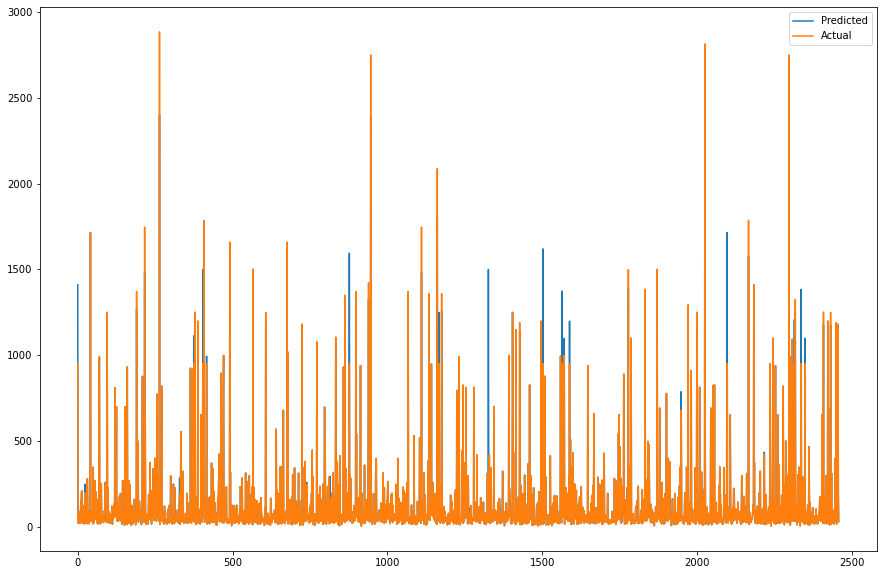

In [148]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_d))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

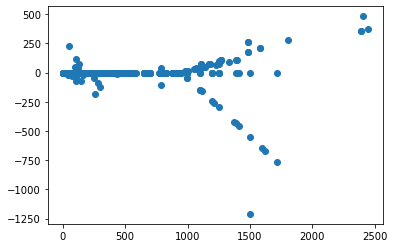

In [149]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

## Random Forest Regression

In [150]:
#Random Forest Regression implementation
rf_regressor = RandomForestRegressor()

In [151]:
rf_pipe = make_pipeline(col_trans,scaled,rf_regressor)

In [152]:
# Fitting the Lasso model
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 5, 6])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [153]:
#getting the X_train and X-test value
y_pred_train_rf=rf_pipe.predict(X_train)
y_pred_test_rf=rf_pipe.predict(X_test)

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_rf))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(1638-1)/(1638-1-10))
print("Adjusted R2 :",(1-(1-r2)*(1638-1)/(1638-1-10)) )

MSE : 2127.8812479402122
RMSE : 46.12896322203884
MAE : 4.656383072319326
R2 : 0.9692504874344685
Adjusted R2 : 0.9690614922742624


In [154]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [155]:
#calculating MSE
MSE= mean_squared_error((y_test), (y_pred_test_rf))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(410-1)/(410-1-10))
print("Adjusted R2 :",(1-(1-r2)*(410-1)/(410-1-10)) )

MSE : 1800.2379471705788
RMSE : 42.42921101282204
MAE : 6.316723438053145
R2 : 0.9716427254227947
Adjusted R2 : 0.9709320167867745


In [156]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)}
test_df=test_df.append(dict2,ignore_index=True)

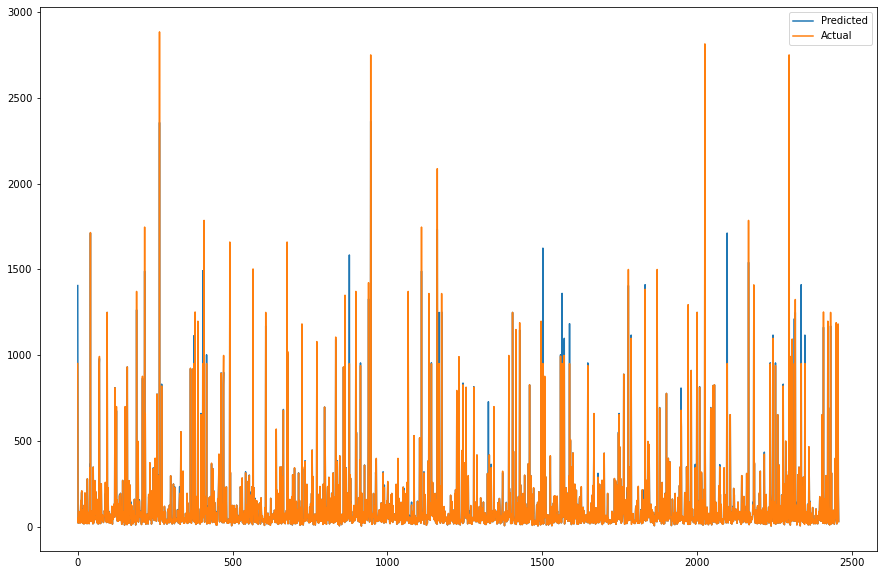

In [157]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_rf))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

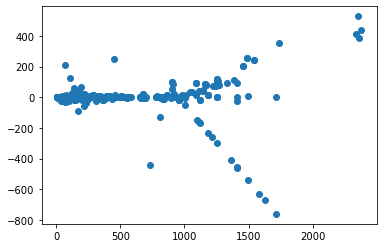

In [158]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

## Gradient Boosting Regression

In [159]:
#Gradient Boosting Regression implementation
gb_regressor = GradientBoostingRegressor()

In [160]:
pipe = make_pipeline(col_trans,scaled,gb_regressor)

In [161]:
# Fitting the Lasso model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 5, 6])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [162]:
#getting the X_train and X-test value
y_pred_train_gb=pipe.predict(X_train)
y_pred_test_gb=pipe.predict(X_test)

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_gb))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(1638-1)/(1638-1-10))
print("Adjusted R2 :",(1-(1-r2)*(1638-1)/(1638-1-10)) )

MSE : 7755.437234464282
RMSE : 88.06496031035432
MAE : 42.791960681729364
R2 : 0.8879279964879645
Adjusted R2 : 0.887239170406145


In [163]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [164]:
#calculating MSE
MSE= mean_squared_error((y_test), (y_pred_test_gb))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_gb)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(410-1)/(410-1-10))
print("Adjusted R2 :",(1-(1-r2)*(410-1)/(410-1-10)) )

MSE : 7310.162069707933
RMSE : 85.4994857862194
MAE : 43.466725568025446
R2 : 0.8848506258073354
Adjusted R2 : 0.8819646765794491


In [165]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

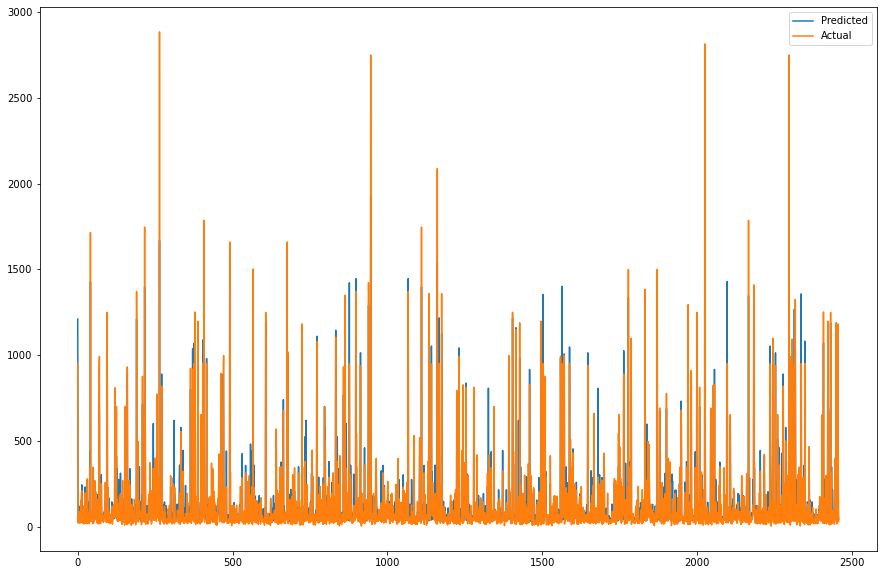

In [166]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_gb))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

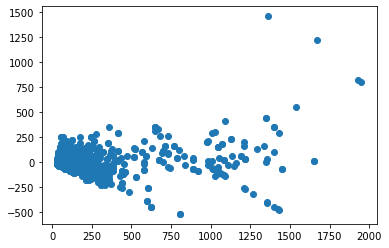

In [167]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))

##  XGBoost

In [168]:
#XGBoost implementation
xgb_regressor = XGBRegressor()

In [169]:
xgb_pipe = make_pipeline(col_trans,scaled,xgb_regressor)

In [170]:
# Fitting the Lasso model
xgb_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 5, 6])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stop...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [171]:
#getting the X_train and X-test value
y_pred_train_xgb=xgb_pipe.predict(X_train)
y_pred_test_xgb=xgb_pipe.predict(X_test)

#calculating MSE
MSE= mean_squared_error((y_train), (y_pred_train_xgb))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train_xgb)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(1638-1)/(1638-1-10))
print("Adjusted R2 :",(1-(1-r2)*(1638-1)/(1638-1-10)) )

MSE : 2737.44716973265
RMSE : 52.32061897314146
MAE : 20.361383035474717
R2 : 0.9604417933450684
Adjusted R2 : 0.9601986574713441


In [172]:
# storing the metrics value in a dataframe for later comparison
dict1={'Model':' Xtreme Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [173]:
#calculating MSE
MSE= mean_squared_error((y_test), (y_pred_test_xgb))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#calculate MAE
MAE= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_test, y_pred_test_xgb)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2)*(410-1)/(410-1-10))
print("Adjusted R2 :",(1-(1-r2)*(410-1)/(410-1-10)) )

MSE : 2388.036690500958
RMSE : 48.86754230060028
MAE : 22.328294254151036
R2 : 0.9623837436382182
Adjusted R2 : 0.9614409803208803


In [174]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Xtreme Gradient boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

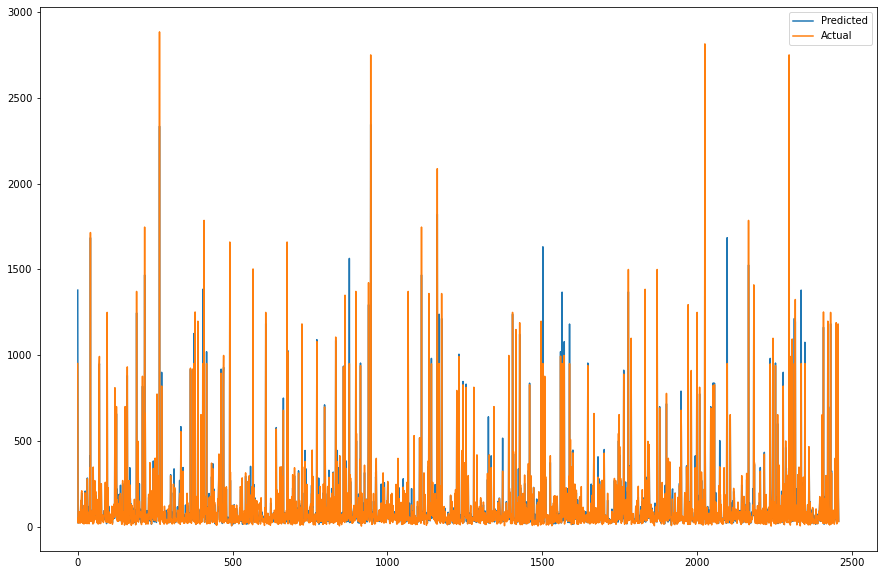

In [175]:
#Ploting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_xgb))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

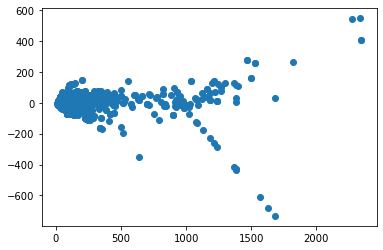

In [176]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_xgb),(y_test)-(y_pred_test_xgb))

# Model Comparision

In [177]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model     MAE        MSE  \
Training set 0                     Linear regression   56.353  14586.452   
             1                      Lasso regression   39.771  12824.463   
             2                      Ridge regression   33.286  12380.818   
             3                Elastic net regression   51.214  17451.420   
             4              Dicision tree regression    3.625   2024.259   
             5              Random forest regression    4.656   2127.881   
             6          Gradient boosting regression   42.792   7755.437   
             7   Xtreme Gradient boosting regression   20.361   2737.447   
Test set     0                     Linear regression   58.746  14488.971   
             1                      Lasso regression   39.616  11836.758   
             2                      Ridge regression   33.614  11505.483   
             3            Elastic net regression Test  50.792  15295.019   
             4              Dicision tree regression    5.236   2192.557   
             5              Random forest regression    6.317   1800.238   
             6          Gradient boosting regression   43.467   7310.162   
             7   Xtreme Gradient boosting regression   22.328   2388.037   

                   RMSE  R2_score  Adjusted R2  
Training set 0  120.774     0.789         0.79  
             1  113.245     0.815         0.81  
             2  111.269     0.821         0.82  
             3  132.104     0.748         0.75  
             4   44.992     0.971         0.97  
             5   46.129     0.969         0.97  
             6   88.065     0.888         0.89  
             7   52.321     0.960         0.96  
Test set     0  120.370     0.772         0.77  
             1  108.797     0.814         0.81  
             2  107.264     0.819         0.81  
             3  123.673     0.759         0.75  
             4   46.825     0.965         0.96  
             5   42.429     0.972         0.97  
             6   85.499     0.885         0.88  
             7   48.868     0.962         0.96

# Final Conclusions

- The best performance is given by the Random forest regression model.
- The top key features that drive the price of the wine are: rating,year,wine,acidity,num_reviews.
- The above data is also reinforced by the analysis done during bivariate analysis.